In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1
Consider the switch SDE: $dX(t) = -c \cdot \text{sgn} (X(t)-m) dt +\sigma dW(t)$. Here, $c, \sigma>0$, and sgn is the signum function: 
\begin{equation}
    \text{sgn}(y) := \begin{cases}
    +1, y>0 ;\\
    0, y=0;  \\
    -1, y< 0. \\
    \end{cases}
\end{equation} Show that the Laplace distribution with mean $m$ and variance $v$ is a stationary distribution, and find the variance $v$.

In [2]:
def SDE1(mu, sigma,c, dt, T):
    simX=[0]
    N=int(T/dt)
    noise = np.random.normal(0,np.sqrt(dt),N)

    for i in range(N):
        old = simX[-1]
        if (old-mu)>0:
            new= -c*dt + sigma*noise[i] + old
        elif (old-mu)<0:
            new= c*dt + sigma*noise[i] + old
        elif (old-mu)==0:   
            sigma*noise[i] + old
        
        simX.append(new)  
    return simX    
        

In [3]:
sigma=.2
m=.5
c=.5
b= sigma**2/(2*c)
dt=0.01
T=20

In [4]:
sims=[]
np.random.seed(1)
for i in range(1000):
    sims.append(SDE1(m,sigma,c, dt, T))

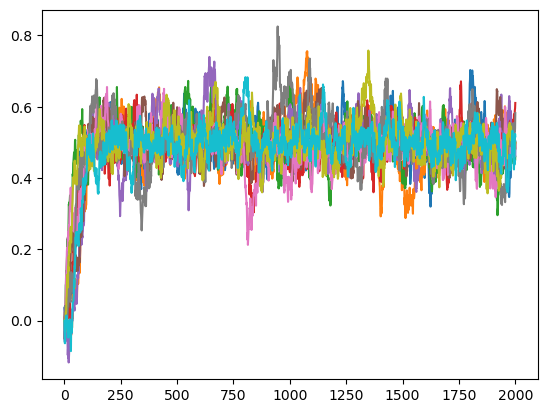

In [5]:
for i in range(10):
    plt.plot(sims[i])

<AxesSubplot:ylabel='Probability'>

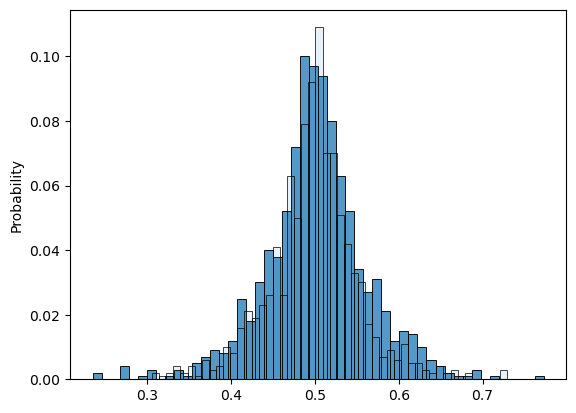

In [6]:
X = np.random.laplace(loc=m, scale=b , size=1000)
sns.histplot(np.array(sims)[:,1000],stat='probability', bins=50)
sns.histplot(X, bins=50,stat='probability', alpha=.1)

In [7]:
print('Empirical mean:', np.mean(np.array(sims)[:,500]))
print('Empirical variance:', np.var(np.array(sims)[:,500]))

print('Theoretical mean:', m)
print('Theoretical variance:', 2*b**2)

Empirical mean: 0.5038519384972718
Empirical variance: 0.0035413485192730544
Theoretical mean: 0.5
Theoretical variance: 0.0032000000000000015


# Question 2  

Consider the Ornstein-Uhlenbeck process in the log scale modeling the Volatility Index VIX: 

\begin{equation}
    d\text{ln}V(t) = (-0.1188\text{ln}V(t) + 0.3482)dt + 0.1589 dW(t), V(0)=16. \\
\end{equation}Find the mean and variance of $V$ in its stationary distribution. 

In [8]:
def SDE2(m,c, sigma, dt, T, X0):
    simX=[X0]
    N= int(T/dt)
    noise = np.random.normal(0,np.sqrt(dt),N)

    for i in range(N):
        old = simX[-1] 
        new= (np.exp(c*m*dt)) * (old**(-c*dt)) * np.exp(sigma*noise[i]) * old
        simX.append(new)  
    return simX
        

In [9]:
c = .1188
m = 0.3482/c
sigma=0.1589
dt= .01
T=30
X0=16

p2 = sigma*2 / 2*c

np.random.seed(1)
sims=[]
for i in range(1000):
    sims.append(SDE2(m,c,sigma, dt, T, X0))

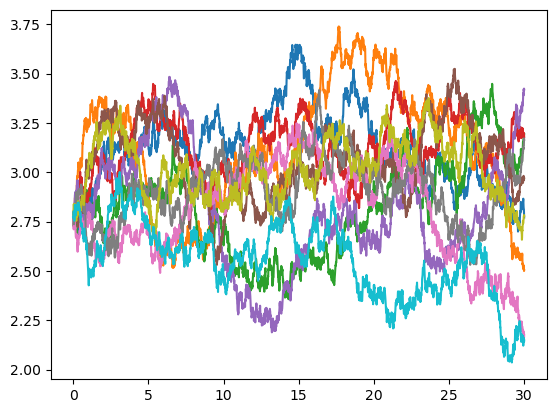

In [10]:
time = np.linspace(0,T,int(T/dt)+1)
for i in range(10):
    plt.plot(time, np.log(sims[i]))

In [11]:
p2 = sigma**2 / (2*c)
print('Empirical mean:', np.mean(np.array(sims)[:,1000:]))
print('Empirical variance:', np.var(np.array(sims)[:,1000:]))

print('Theoretical mean:', np.exp(m + (p2/2)))
print('Theoretical variance:', (np.exp(2*m + 4*p2/2) -  np.exp(m + p2/2)**2))

Empirical mean: 19.335080974581142
Empirical variance: 43.44341712167216
Theoretical mean: 19.76890582446917
Theoretical variance: 43.81740930293188


<AxesSubplot:ylabel='Probability'>

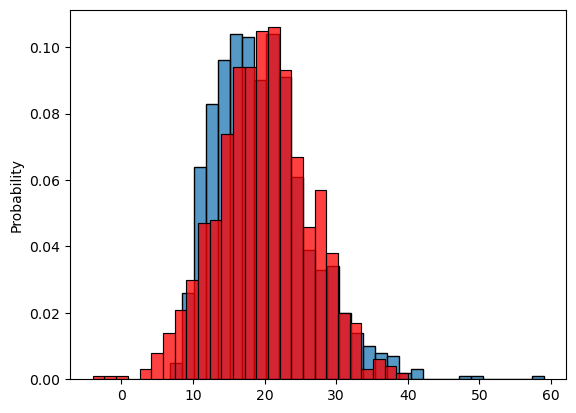

In [17]:
X = np.random.normal(19.76890582446917, np.sqrt(43.81740930293188), size=1000)
sns.histplot(np.array(sims)[:,2500], stat='probability')
sns.histplot(X, stat='probability', color='red')